# Regression with CART Trees - Lab

## Introduction

In this lab, we shall put into practice, the skills shown in the previous code along. We shall use a simple dataset from Kaggle, called the ["Petrol Consumption Dataset"](https://www.kaggle.com/harinir/petrol-consumption) which entails the petrol consumption for a bunch of examples, based on drivers' features.

## Objectives
You will be able to:
- Conduct a regression experiment using CART trees
- Evaluate the model fit and study the impact of hyper parameters on the final tree
- Understand training, prediction, evaluation and visualizations required to run regression experiments using trees

## Import necessary libraries 

In [1]:
# Import libraries 
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt

## Read the dataset `petrol_consumption.csv` and view its head and dimensions

In [3]:
# Read the dataset and view head and dimensions

df = pd.read_csv('petrol_consumption.csv')
df.head()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
0,9.0,3571,1976,0.525,541
1,9.0,4092,1250,0.572,524
2,9.0,3865,1586,0.580,561
3,7.5,4870,2351,0.529,414
4,8.0,4399,431,0.544,410


## Check the basic statistics for the dataset and inspect the target variable `Petrol_Consumption`

In [4]:
# Describe the dataset

df.describe()

,Petrol_tax,Average_income,Paved_Highways,Population_Driver_licence(%),Petrol_Consumption
count,48.000000,48.000000,48.000000,48.000000,48.000000
mean,7.668333,4241.833333,5565.416667,0.570333,576.770833
std,0.950770,573.623768,3491.507166,0.055470,111.885816
min,5.000000,3063.000000,431.000000,0.451000,344.000000
25%,7.000000,3739.000000,3110.250000,0.529750,509.500000
50%,7.500000,4298.000000,4735.500000,0.564500,568.500000
75%,8.125000,4578.750000,7156.000000,0.595250,632.750000
max,10.000000,5342.000000,17782.000000,0.724000,968.000000


## Create features, labels and train/test datasets with a 80/20 split

As with the classification task, we will divide our data into attributes/features and labels and consequently into training and test sets.

In [17]:
# Create datasets for training and test
from sklearn.model_selection import train_test_split

X = df.drop('Petrol_Consumption', axis=1)
y = df['Petrol_Consumption']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=0)

## Create an instance of CART regressor and fit the data to the model 

As mentioned earlier, for a regression task we'll use a different `sklearn` class than we did for the classification task. The class we'll be using here is the `DecisionTreeRegressor` class, as opposed to the `DecisionTreeClassifier` from before.

In [18]:
# Train a regression tree model with training data 
from sklearn.tree import DecisionTreeRegressor

reg = DecisionTreeRegressor()
reg.fit(X_train, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

 ## Using test set, make predictions and calculate the MAE, MSE and RMSE
 
To evaluate performance of the regression algorithm, the commonly used metrics are mean absolute error, mean squared error, and root mean squared error. The `sklearn` library contains functions that can help calculate these values for us. To do so, use this code from the `metrics` package.

In [19]:
# Predict and evaluate the predictions
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error as mse

y_pred = reg.predict(X_test)

print(f'Mean Absolute Error: {mae(y_test, y_pred)}')
print(f'Mean Squared Error: {mse(y_test, y_pred)}')
print(f'RMSE: {np.sqrt(mse(y_test, y_pred))}')

Mean Absolute Error: 53.7
Mean Squared Error: 5290.9
RMSE: 72.73857298572746


## Visualize the tree using `graphviz`

Let's visualize our learnt tree as we have been doing in previous lessons and labs. 

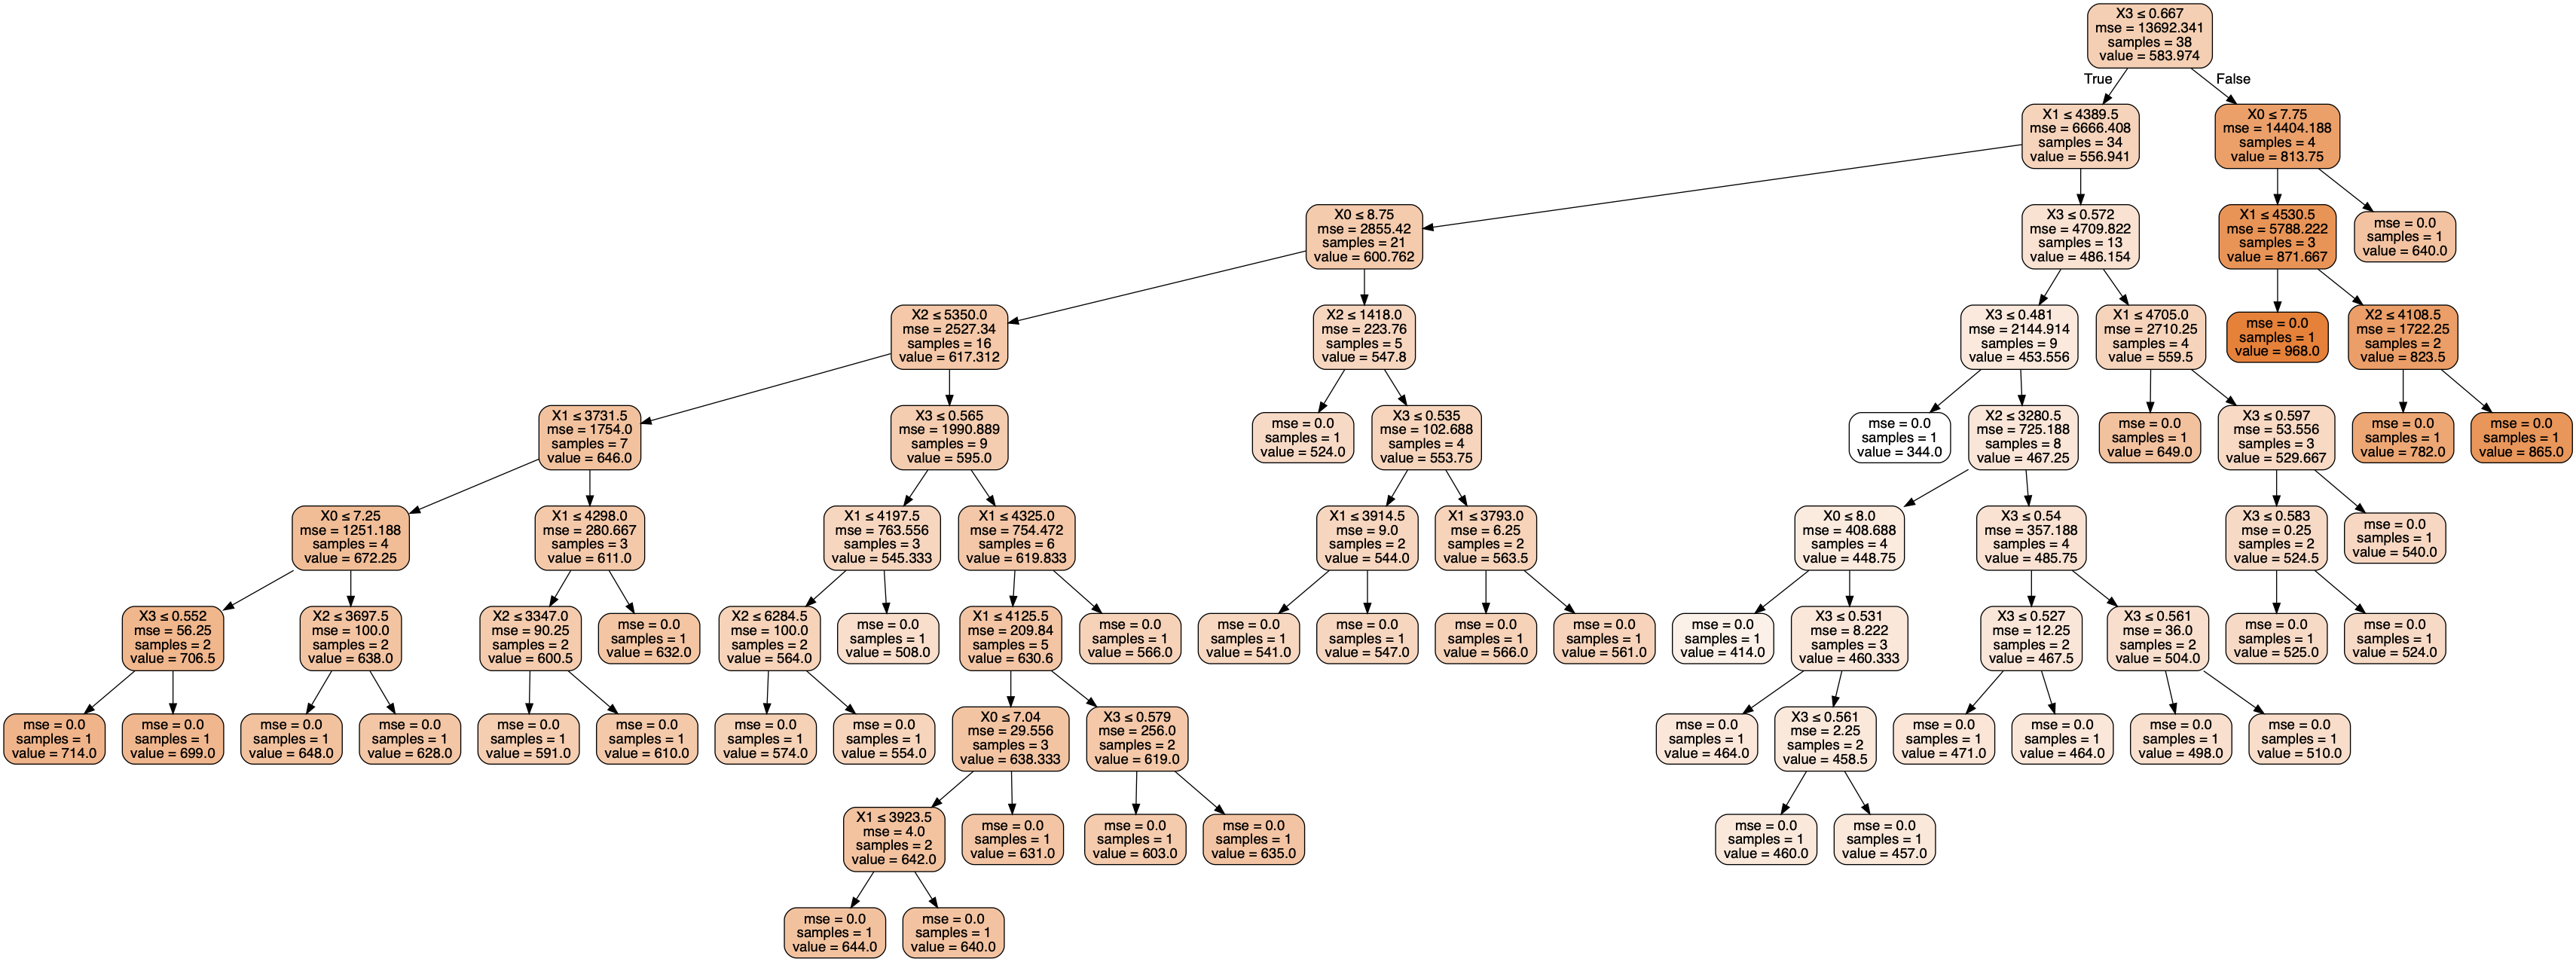

In [21]:
# Visualize the decision tree using graph viz library
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

dot_data = StringIO()
export_graphviz(reg, out_file=dot_data, filled=True, rounded=True,special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

## Level Up - Optional 

- In order to understand and interpret a tree structure, we need some domain knowledge in which the data was generated. That can help us inspect each leaf and investigate/prune the tree based on qualitative analysis. 

- Look at the hyper parameters used in the regression tree, check their values ranges in official doc and try running some optimization by growing a number of trees in a loop. 

- Use a dataset that you are familiar with and run tree regression to see if you can interpret the results.

- Check for outliers, try normalization and see the impact on the output 

In [47]:
# Create function to build optimized decision tree

def build_dec_tree(X, y, measure = 'RMSE', test_size=.2, random_state=10):
    """
    This function takes in a set of independent variables (X) and a target variable (y), then iterates through 10,000 different hyperparameter combinations to find the optimal decision tree.
    
    The function will optionally take in the following parameters to tune how the decision tree is optimized:
    
       crit: Default is 'entropy' for Information Gain, but may also be set to 'gini' for Gini Impurity
       
       measure: Will optimize decision tree to maximize the given measurement type. Default is 'AUC'
          'AUC': Area Under Curve using ROC Curve
          'Accuracy': Overall Accuracy Score
          'F1': F-Measure
          'Precision': Minimize false positives
          'Recall': Minimize false negatives
    """
    from sklearn.metrics import mean_absolute_error as mae
    from sklearn.metrics import mean_squared_error as mse
 
    import warnings
    warnings.simplefilter('ignore')
    
    print(f'Building Decision Tree Using {measure} Scoring Optimization\n')
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)
    
    # Create empty dictionary for hyperparameters & scores associated with top result
    top_score = {'Measure': measure,
                 'Max Depth': 0, 
                 'Min Samples Split': 0, 
                 'Min Samples Leaf': 0, 
                 'Max Features':0, 
                 'Mean Absolute Error': 0, 
                 'Mean Squared Error': 0, 
                 'RMSE': 0}
    
    # Iterate through 10,000 possible hyperparameter combinations.
    total_iterations = 0
    for i in np.arange(1, 11, 1): # max_depth
        for j in np.arange(0.05, 1, .1): # min_samples_split
            for k in np.arange(1, 11, 1): # min_samples_leaf
                for l in np.arange(1, len(X.columns), 1): # max_features
                    if total_iterations % 1000 == 0:
                        print(f'  {total_iterations/30:.0f}% Complete')
                    total_iterations += 1
                    clf = DecisionTreeRegressor(random_state=random_state, 
                                                 max_depth=i, 
                                                 min_samples_split=j, 
                                                 min_samples_leaf=k, 
                                                 max_features=l)
                    
                    clf.fit(X_train, y_train)
    
                    y_pred = clf.predict(X_test)
    
                    MAE = mae(y_test, y_pred)
                    MSE = mse(y_test, y_pred)
                    RMSE = np.sqrt(MSE)

                    # Optimize decision tree based on results of selected criteria. AUC is default. 
                    if ((measure == 'MAE' and MAE < top_score['Mean Absolute Error']) or 
                        (measure == 'MSE' and MSE < top_score['Mean Squared Error']) or 
                        (measure == 'RMSE' and RMSE < top_score['RMSE']) or 
                        (total_iterations == 1)):
                            top_score['Max Depth'] = i
                            top_score['Min Samples Split'] = j
                            top_score['Min Samples Leaf'] = k
                            top_score['Max Features'] = l
                            top_score['Mean Absolute Error'] = MAE
                            top_score['Mean Squared Error'] = MSE
                            top_score['RMSE'] = RMSE

                            # Create decision tree visualization
                            dot_data = StringIO()
                            export_graphviz(clf, 
                                            out_file=dot_data, 
                                            filled=True, 
                                            rounded=True, 
                                            special_characters=True, 
                                            feature_names=X.columns)
                            graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
    
    print(f'  {total_iterations/30:.0f}% Complete\n')
    
    # Display Results
    for key in list(top_score.keys())[1:]:
        if type(top_score[key]) == np.float64:
            print(f'{key}: {top_score[key]:.4f}')
        else:
            print(f'{key}: {top_score[key]}')
    
    return top_score, Image(graph.create_png())

Building Decision Tree Using RMSE Scoring Optimization

  0% Complete
  33% Complete
  67% Complete
  100% Complete

Max Depth: 5
Min Samples Split: 0.0500
Min Samples Leaf: 1
Max Features: 2
Mean Absolute Error: 41.7700
Mean Squared Error: 3255.7970
RMSE: 57.0596


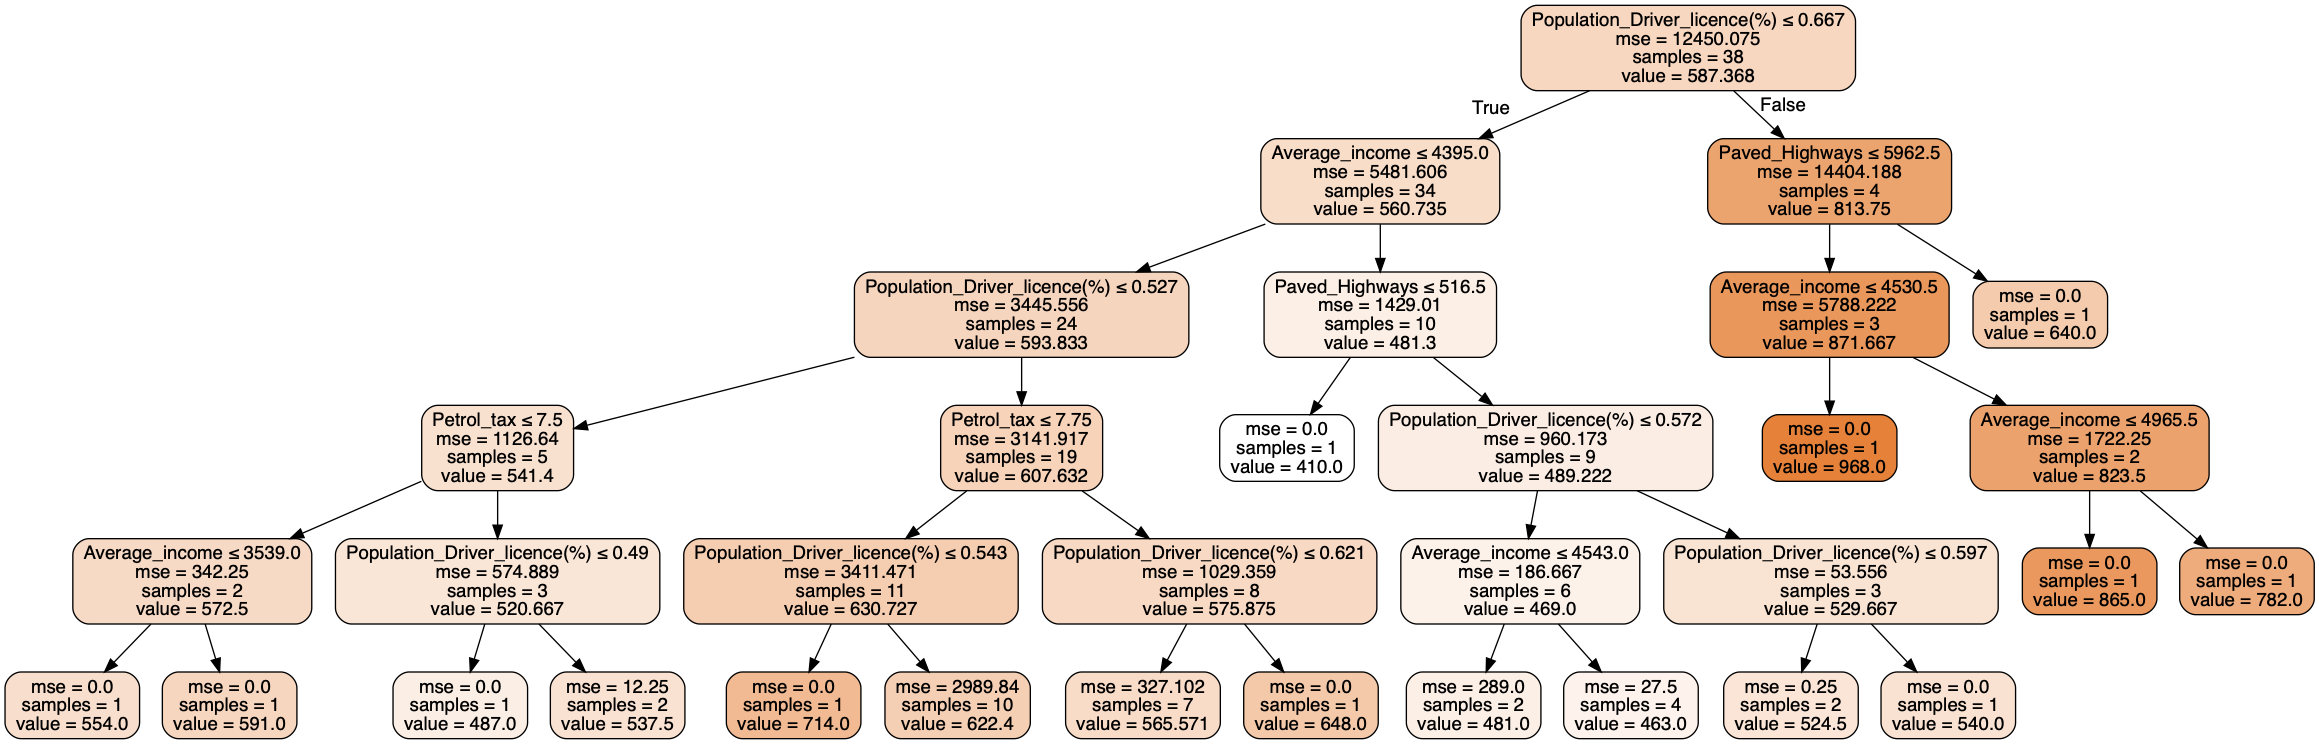

In [48]:
top_score, tree = build_dec_tree(X, y)
tree

## Summary 

In this lesson, we developed a tree regressor architecture to train the regressor and predict values for unseen data. We saw that with a vanilla approach, the results were not so great, and this requires further pre-tuning of the model (what we described as hyper parameter optimization OR pruning in the case of trees. 